In [2]:
import pandas as pd

df = pd.read_csv('data/raw_data.csv')
df.head()


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
df.shape


(30471, 292)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [4]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30471.0,NaN,NaN,NaN,15237.917397,8796.501536,1.0,7620.5,15238.0,22855.5,30473.0
timestamp,30471,1161,2014-12-16,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_sq,30471.0,NaN,NaN,NaN,54.214269,38.031487,0.0,38.0,49.0,63.0,5326.0
life_sq,24088.0,NaN,NaN,NaN,34.403271,52.285733,0.0,20.0,30.0,43.0,7478.0
floor,30304.0,NaN,NaN,NaN,7.670803,5.319989,0.0,3.0,6.5,11.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,30471.0,NaN,NaN,NaN,0.442421,0.609269,0.0,0.0,0.0,1.0,2.0
leisure_count_5000,30471.0,NaN,NaN,NaN,8.648814,20.580741,0.0,0.0,2.0,7.0,106.0
sport_count_5000,30471.0,NaN,NaN,NaN,52.796593,46.29266,0.0,11.0,48.0,76.0,218.0
market_count_5000,30471.0,NaN,NaN,NaN,5.98707,4.889219,0.0,1.0,5.0,10.0,21.0


In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing.head(20)


hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_sum_500_max_price_avg               13281
cafe_avg_price_500                       13281
cafe_sum_500_min_price_avg               13281
num_room                                  9572
kitch_sq                                  9572
max_floor                                 9572
material                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_sum_1000_max_price_avg               6524
cafe_sum_1000_min_price_avg               6524
cafe_avg_price_1000                       6524
life_sq                                   6383
build_count_mix                           4991
raion_build_count_with_builddate_info     4991
build_count_before_1920                   4991
build_count_1921-1945                     4991
dtype: int64

In [6]:
cols_to_drop = [
    'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_sum_500_min_price_avg',
    'cafe_sum_1000_max_price_avg', 'cafe_sum_1000_min_price_avg', 'cafe_avg_price_1000',
    'build_count_mix', 'raion_build_count_with_builddate_info',
    'build_count_before_1920', 'build_count_1921-1945'
]

df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)


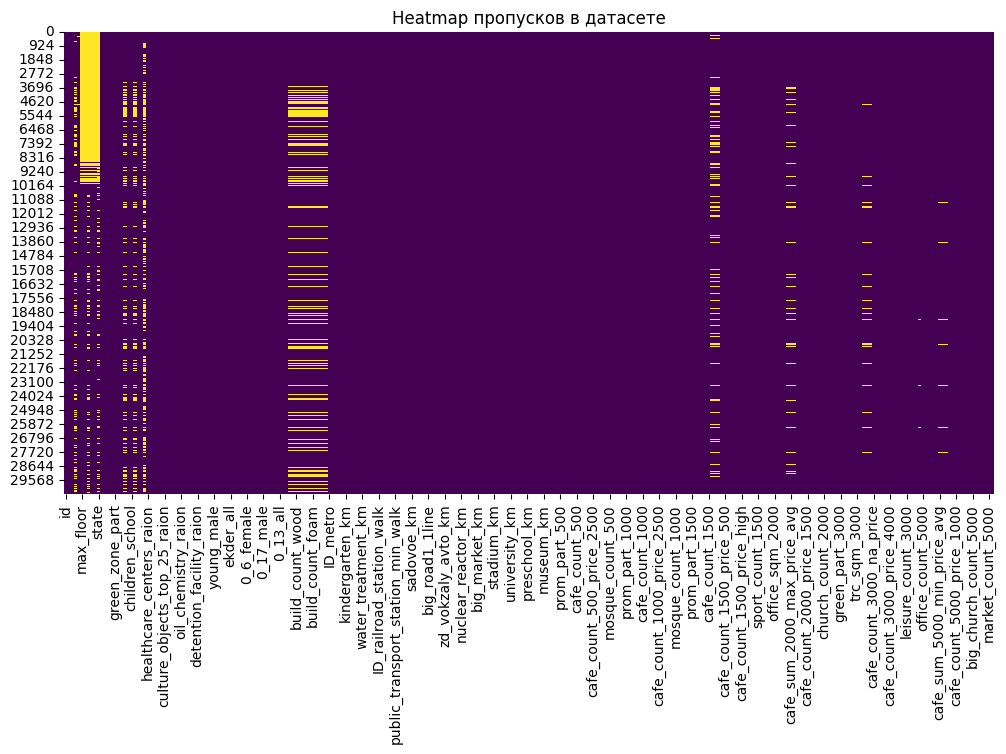

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull().astype(int), 
            cmap='viridis',
            cbar=False)
plt.title("Heatmap пропусков в датасете")
plt.show()


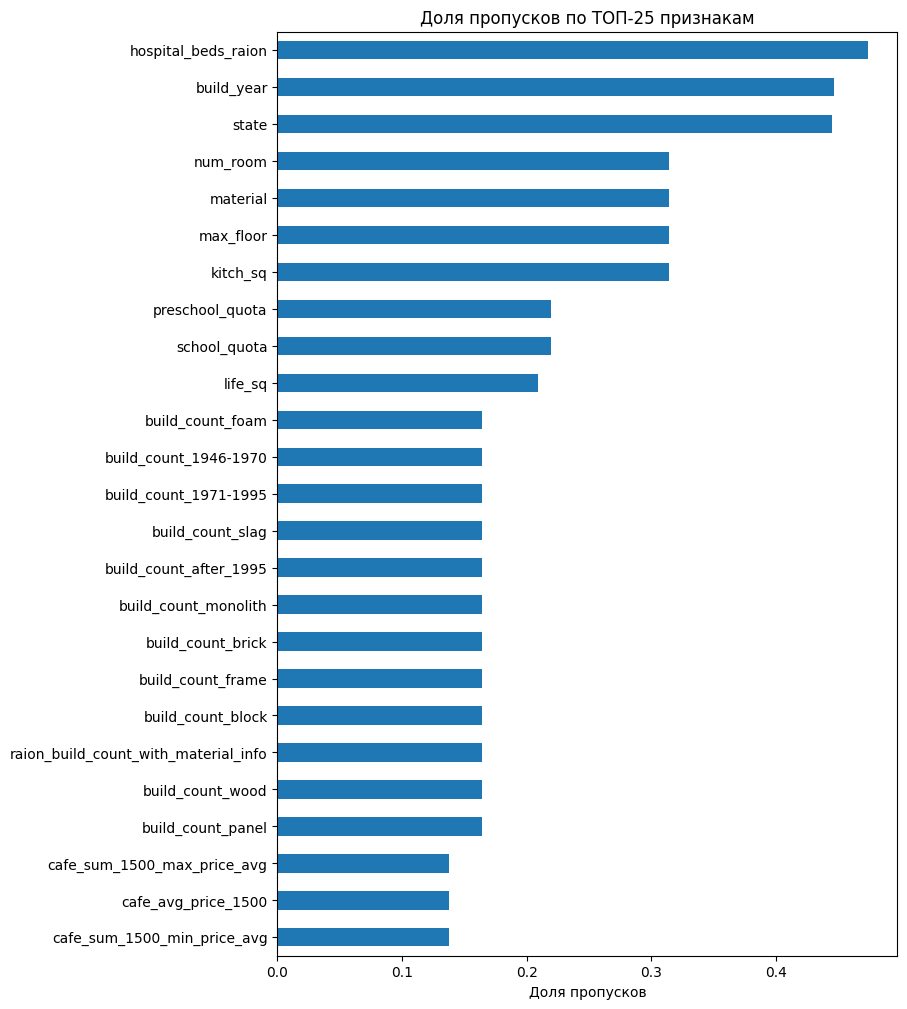

In [8]:
missing = df.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(8, 12))
missing.head(25).plot(kind='barh')
plt.title("Доля пропусков по ТОП-25 признакам")
plt.xlabel("Доля пропусков")
plt.gca().invert_yaxis()
plt.show()


In [9]:
# life_sq > full_sq → это ошибка ввода, ставим NaN
df.loc[df['life_sq'] > df['full_sq'], 'life_sq'] = None

# life_sq == 0 → NaN
df.loc[df['life_sq'] == 0, 'life_sq'] = None

# kitch_sq > full_sq → NaN
df.loc[df['kitch_sq'] > df['full_sq'], 'kitch_sq'] = None

# kitch_sq == 0 → NaN
df.loc[df['kitch_sq'] == 0, 'kitch_sq'] = None

# Заполнение корректными значениями
df['life_sq'] = df['life_sq'].fillna(df['life_sq'].median())
df['kitch_sq'] = df['kitch_sq'].fillna(df['kitch_sq'].median())


In [10]:
df.loc[df['floor'] == 0, 'floor'] = None

df.loc[df['max_floor'] == 0, 'max_floor'] = None

df.loc[df['floor'] > df['max_floor'], 'max_floor'] = df['floor']

df['floor'] = df['floor'].fillna(df['floor'].median())
df['max_floor'] = df['max_floor'].fillna(df['max_floor'].median())


In [11]:
# 0 комнат — ошибка
df.loc[df['num_room'] == 0, 'num_room'] = None

df['num_room'] = df['num_room'].fillna(df['num_room'].median())


In [12]:
# убираем мусорные года 
df.loc[df['build_year'] < 1600, 'build_year'] = None
df.loc[df['build_year'] > 2024, 'build_year'] = None

df['build_year'] = df['build_year'].fillna(df['build_year'].median())


In [13]:
df['state'] = df['state'].fillna(df['state'].mode()[0])


In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [15]:
df[df['life_sq'] > df['full_sq']]


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
1188,1189,2012-02-14,9,30.0,3.0,14.0,NaN,1981.0,2.0,6.0,...,6,3,0,9,18,0,10,53,9,6300000
1822,1825,2012-04-09,18,30.0,7.0,14.0,NaN,1981.0,2.0,6.0,...,6,1,0,8,23,0,3,55,9,5200000
2009,2012,2012-04-25,5,30.0,5.0,14.0,NaN,1981.0,2.0,6.0,...,6,2,0,10,14,0,2,50,5,5770000
3388,3391,2012-08-29,29,30.0,2.0,14.0,NaN,1981.0,2.0,6.0,...,0,0,0,0,4,0,0,2,0,1885866
3735,3738,2012-09-20,22,30.0,10.0,14.0,NaN,1981.0,2.0,6.0,...,1,0,0,1,7,0,0,8,0,4637566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29495,29498,2015-04-30,28,30.0,4.0,4.0,1.0,2015.0,1.0,1.0,...,371,141,26,150,249,2,105,203,13,2543433
29564,29567,2015-05-06,28,30.0,12.0,12.0,1.0,1981.0,1.0,1.0,...,1,0,0,0,6,0,0,0,0,2567916
29771,29774,2015-05-18,26,30.0,2.0,17.0,1.0,2016.0,1.0,1.0,...,1,0,0,0,6,0,0,0,0,2422315
29956,29959,2015-05-27,29,30.0,3.0,3.0,1.0,1981.0,1.0,1.0,...,0,0,0,0,4,0,0,2,0,2860197


In [16]:
# life_sq > full_sq → ошибка
df.loc[df['life_sq'] > df['full_sq'], 'life_sq'] = None

# life_sq == 0 → мусор
df.loc[df['life_sq'] == 0, 'life_sq'] = None

# kitch_sq > full_sq → мусор
df.loc[df['kitch_sq'] > df['full_sq'], 'kitch_sq'] = None

# kitch_sq == 0 → мусор
df.loc[df['kitch_sq'] == 0, 'kitch_sq'] = None

# Повторное заполнение медианой
df['life_sq'] = df['life_sq'].fillna(df['life_sq'].median())
df['kitch_sq'] = df['kitch_sq'].fillna(df['kitch_sq'].median())


In [17]:
df[df['life_sq'] > df['full_sq']]


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
1188,1189,2012-02-14,9,30.0,3.0,14.0,NaN,1981.0,2.0,6.0,...,6,3,0,9,18,0,10,53,9,6300000
1822,1825,2012-04-09,18,30.0,7.0,14.0,NaN,1981.0,2.0,6.0,...,6,1,0,8,23,0,3,55,9,5200000
2009,2012,2012-04-25,5,30.0,5.0,14.0,NaN,1981.0,2.0,6.0,...,6,2,0,10,14,0,2,50,5,5770000
3388,3391,2012-08-29,29,30.0,2.0,14.0,NaN,1981.0,2.0,6.0,...,0,0,0,0,4,0,0,2,0,1885866
3735,3738,2012-09-20,22,30.0,10.0,14.0,NaN,1981.0,2.0,6.0,...,1,0,0,1,7,0,0,8,0,4637566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29495,29498,2015-04-30,28,30.0,4.0,4.0,1.0,2015.0,1.0,1.0,...,371,141,26,150,249,2,105,203,13,2543433
29564,29567,2015-05-06,28,30.0,12.0,12.0,1.0,1981.0,1.0,1.0,...,1,0,0,0,6,0,0,0,0,2567916
29771,29774,2015-05-18,26,30.0,2.0,17.0,1.0,2016.0,1.0,1.0,...,1,0,0,0,6,0,0,0,0,2422315
29956,29959,2015-05-27,29,30.0,3.0,3.0,1.0,1981.0,1.0,1.0,...,0,0,0,0,4,0,0,2,0,2860197


In [18]:
df.loc[df['life_sq'] > df['full_sq'], 'life_sq'] = None
df.loc[df['kitch_sq'] > df['full_sq'], 'kitch_sq'] = None

df.loc[df['life_sq'] == 0, 'life_sq'] = None
df.loc[df['kitch_sq'] == 0, 'kitch_sq'] = None


In [19]:
df.loc[df['full_sq'] < 10, 'full_sq'] = None


In [20]:
df['full_sq'] = df['full_sq'].fillna(df['full_sq'].median())
df['life_sq'] = df['life_sq'].fillna(df['life_sq'].median())
df['kitch_sq'] = df['kitch_sq'].fillna(df['kitch_sq'].median())


In [21]:
df[df['life_sq'] > df['full_sq']]


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
1822,1825,2012-04-09,18.0,30.0,7.0,14.0,NaN,1981.0,2.0,6.0,...,6,1,0,8,23,0,3,55,9,5200000
3388,3391,2012-08-29,29.0,30.0,2.0,14.0,NaN,1981.0,2.0,6.0,...,0,0,0,0,4,0,0,2,0,1885866
3735,3738,2012-09-20,22.0,30.0,10.0,14.0,NaN,1981.0,2.0,6.0,...,1,0,0,1,7,0,0,8,0,4637566
4053,4056,2012-10-04,27.0,30.0,7.0,14.0,NaN,1981.0,2.0,6.0,...,2,2,0,1,12,1,0,8,0,3197000
4803,4806,2012-11-19,28.0,30.0,4.0,14.0,NaN,1981.0,2.0,6.0,...,8,2,0,6,18,0,3,50,10,1878010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29495,29498,2015-04-30,28.0,30.0,4.0,4.0,1.0,2015.0,1.0,1.0,...,371,141,26,150,249,2,105,203,13,2543433
29564,29567,2015-05-06,28.0,30.0,12.0,12.0,1.0,1981.0,1.0,1.0,...,1,0,0,0,6,0,0,0,0,2567916
29771,29774,2015-05-18,26.0,30.0,2.0,17.0,1.0,2016.0,1.0,1.0,...,1,0,0,0,6,0,0,0,0,2422315
29956,29959,2015-05-27,29.0,30.0,3.0,3.0,1.0,1981.0,1.0,1.0,...,0,0,0,0,4,0,0,2,0,2860197


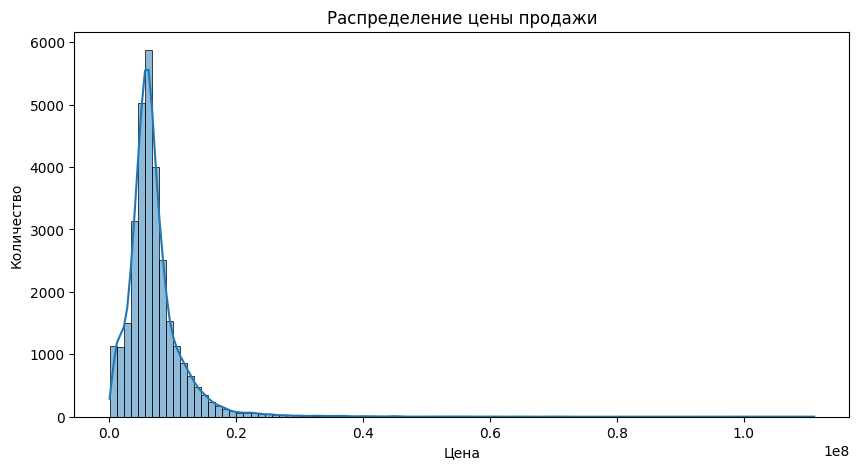

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['price_doc'], bins=100, kde=True)
plt.title("Распределение цены продажи")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.savefig("results/plots/01_price_distribution.png", dpi=300, bbox_inches="tight")

plt.show()


In [23]:
from datetime import datetime
current_year = datetime.now().year

# Возраст здания
df['building_age'] = current_year - df['build_year']

# Отношение жилой площади к общей
df['life_ratio'] = df['life_sq'] / df['full_sq']

# Отношение кухни к общей площади
df['kitch_ratio'] = df['kitch_sq'] / df['full_sq']

# Цена за квадратный метр
df['price_per_m2'] = df['price_doc'] / df['full_sq']

# Логарифм цены (часто используют для нормализации)
df['log_price'] = np.log1p(df['price_doc'])


NameError: name 'np' is not defined

In [24]:
import numpy
from datetime import datetime

# текущий год
current_year = datetime.now().year

# возраст здания
df['building_age'] = current_year - df['build_year']

# отношение жилой площади к общей
df['life_ratio'] = df['life_sq'] / df['full_sq']

# отношение кухни к общей площади
df['kitch_ratio'] = df['kitch_sq'] / df['full_sq']

# цена за квадратный метр
df['price_per_m2'] = df['price_doc'] / df['full_sq']

# логарифм цены (нормализация)
df['log_price'] = numpy.log1p(df['price_doc'])


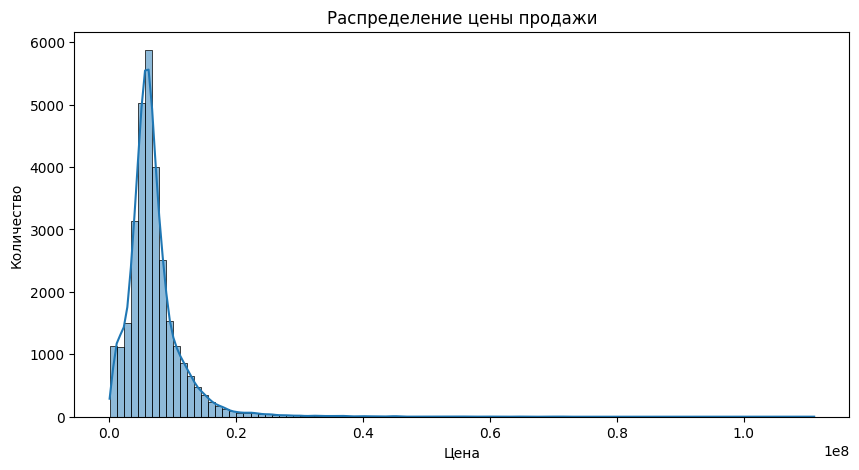

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['price_doc'], bins=100, kde=True)
plt.title("Распределение цены продажи")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.show()



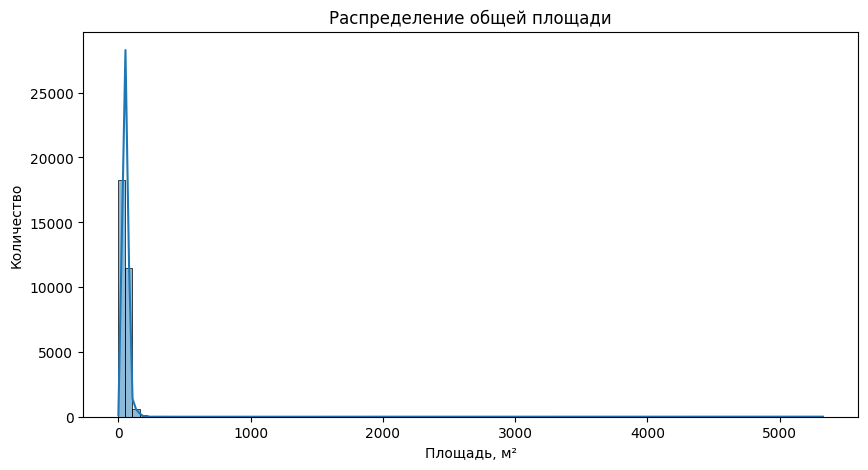

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['full_sq'], bins=100, kde=True)
plt.title("Распределение общей площади")
plt.xlabel("Площадь, м²")
plt.ylabel("Количество")
plt.savefig("results/plots/02_full_sq_distribution.png", dpi=300, bbox_inches="tight")

plt.show()


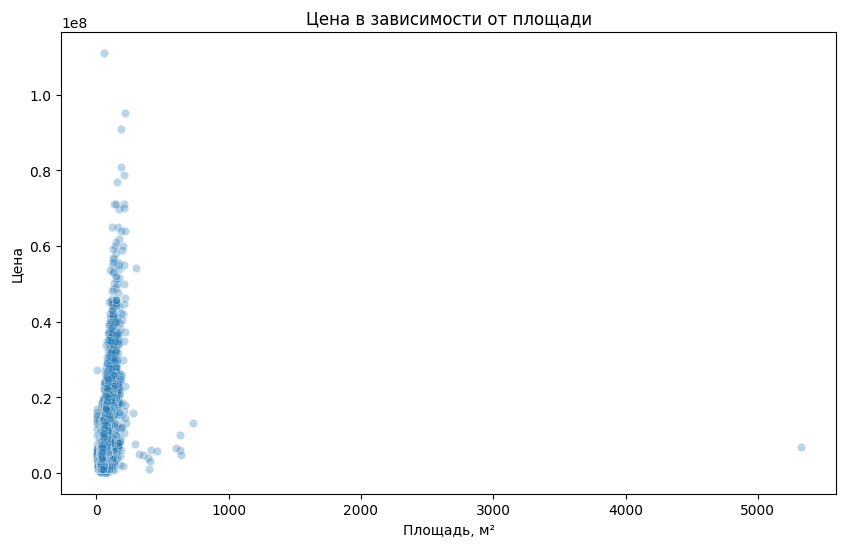

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='full_sq', y='price_doc', data=df, alpha=0.3)
plt.title("Цена в зависимости от площади")
plt.xlabel("Площадь, м²")
plt.ylabel("Цена")
plt.savefig("results/plots/03_price_vs_area_scatter.png", dpi=300, bbox_inches="tight")

plt.show()


In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_m2'], bins=100, kde=True)
plt.title("Распределение цены за квадратный метр")
plt.xlabel("Цена за м²")
plt.ylabel("Количество")
plt.savefig("results/plots/04_price_per_m2_distribution.png", dpi=300, bbox_inches="tight")

plt.show()


KeyError: 'price_per_m2'

<Figure size 1000x500 with 0 Axes>

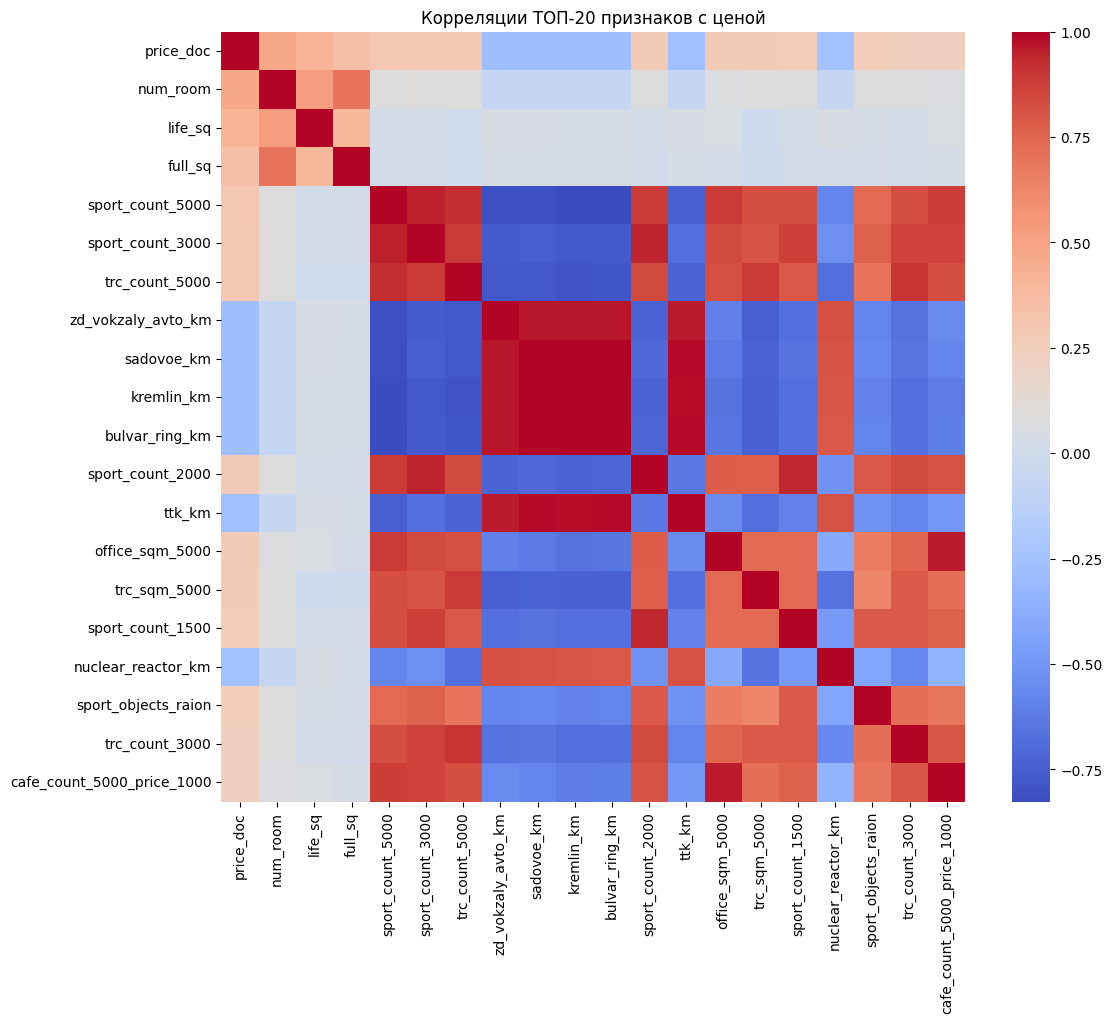

In [18]:
top_corr = (
    df.corr(numeric_only=True)['price_doc']
    .abs()
    .sort_values(ascending=False)
    .head(20)
    .index
)

plt.figure(figsize=(12, 10))
sns.heatmap(df[top_corr].corr(), annot=False, cmap='coolwarm')
plt.title("Корреляции ТОП-20 признаков с ценой")
plt.savefig("results/plots/05_missing_values_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()


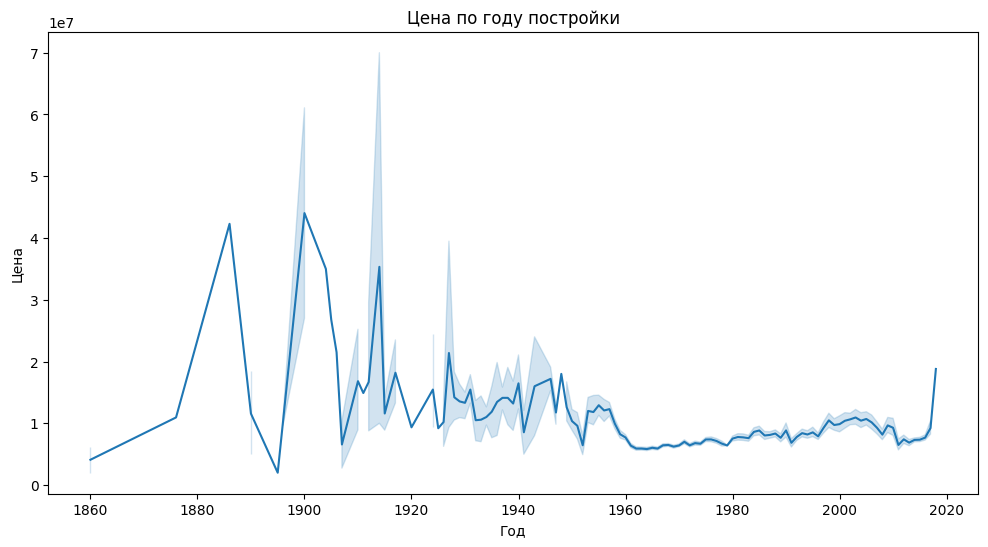

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='build_year', y='price_doc', data=df)
plt.title("Цена по году постройки")
plt.xlabel("Год")
plt.ylabel("Цена")
plt.savefig("results/plots/07_price_by_build_year.png", dpi=300, bbox_inches="tight")

plt.show()


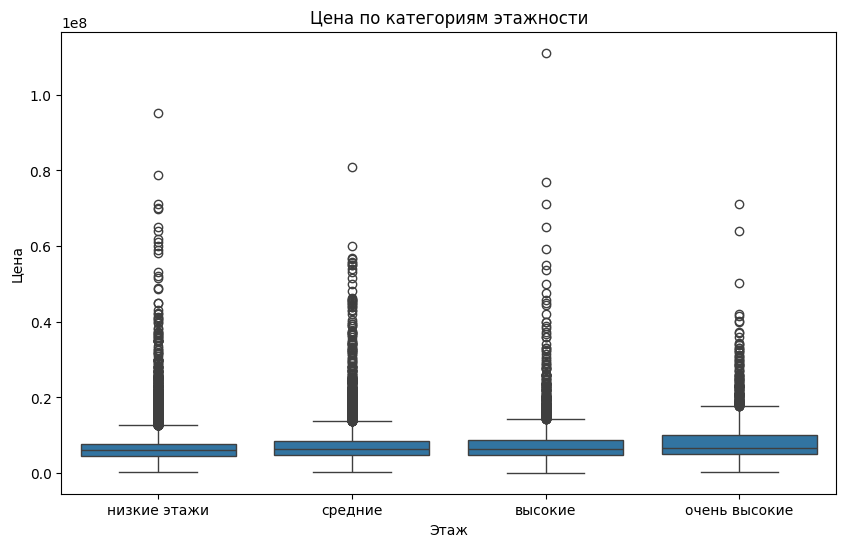

In [21]:
df['floor_bin'] = pd.cut(
    df['floor'],
    bins=[0, 5, 10, 15, 30],
    labels=['низкие этажи', 'средние', 'высокие', 'очень высокие']
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='floor_bin', y='price_doc', data=df)
plt.title("Цена по категориям этажности")
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.savefig("results/plots/08_floor_category_vs_price.png", dpi=300, bbox_inches="tight")

plt.show()


In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df['log_price'], bins=100, kde=True)
plt.title("Распределение логарифма цены")
plt.xlabel("log(цена)")
plt.ylabel("Количество")
plt.savefig("results/plots/09_log_price_distribution.png", dpi=300, bbox_inches="tight")

plt.show()


KeyError: 'log_price'

<Figure size 1000x500 with 0 Axes>

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(numpy.log1p(df['full_sq']), bins=100, kde=True)
plt.title("Распределение логарифма площади")
plt.xlabel("log(площадь)")
plt.ylabel("Количество")
plt.show()


NameError: name 'numpy' is not defined

<Figure size 1000x500 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=numpy.log1p(df['full_sq']),
    y=numpy.log1p(df['price_doc']),
    alpha=0.3
)
plt.title("log(Цена) vs log(Площадь)")
plt.xlabel("log(Площадь)")
plt.ylabel("log(Цена)")
plt.savefig("results/plots/11_log_price_vs_log_area.png", dpi=300, bbox_inches="tight")

plt.show()


NameError: name 'numpy' is not defined

<Figure size 1000x600 with 0 Axes>

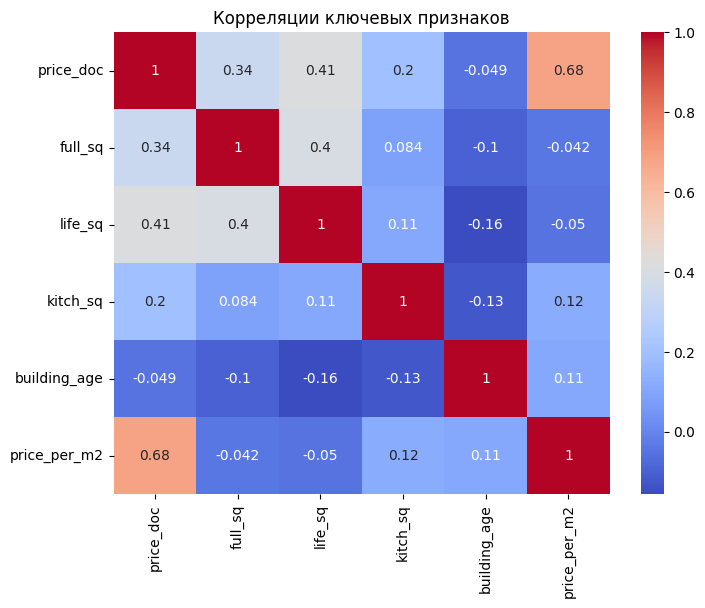

In [35]:
corr = df[['price_doc','full_sq','life_sq','kitch_sq','building_age','price_per_m2']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Корреляции ключевых признаков")
plt.show()


In [36]:
df_clean = df[(df['full_sq'] < 200) & (df['price_doc'] < 5e7)]


<Axes: xlabel='full_sq', ylabel='price_doc'>

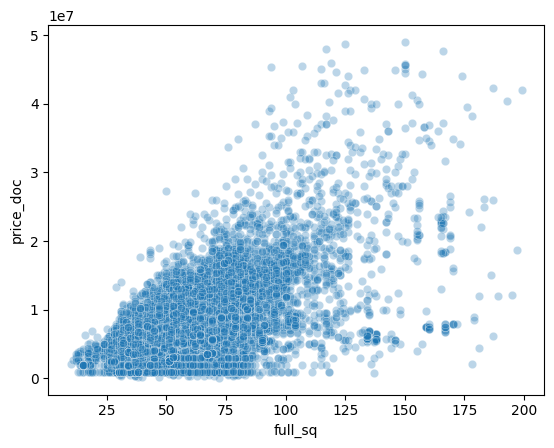

In [37]:
sns.scatterplot(x=df_clean['full_sq'], y=df_clean['price_doc'], alpha=0.3)


In [5]:
df[['price_doc', 'full_sq']].describe()


,price_doc,full_sq
count,3.047100e+04,30471.000000
mean,7.123035e+06,54.214269
std,4.780111e+06,38.031487
min,1.000000e+05,0.000000
25%,4.740002e+06,38.000000
50%,6.274411e+06,49.000000
75%,8.300000e+06,63.000000
max,1.111111e+08,5326.000000


In [6]:
df['full_sq'].fillna(df['full_sq'].median(), inplace=True)
df['life_sq'].fillna(df['life_sq'].median(), inplace=True)
df['kitch_sq'].fillna(df['kitch_sq'].median(), inplace=True)
df['build_year'].fillna(df['build_year'].median(), inplace=True)
df['floor'].fillna(df['floor'].median(), inplace=True)
df['max_floor'].fillna(df['max_floor'].median(), inplace=True)


C:\Users\shari\AppData\Local\Temp\ipykernel_1480\2182649534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['full_sq'].fillna(df['full_sq'].median(), inplace=True)
C:\Users\shari\AppData\Local\Temp\ipykernel_1480\2182649534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [7]:
# Проверим аномальные значения
anomalies = {
    "full_sq отрицательные": df[df['full_sq'] <= 0].shape[0],
    "life_sq > full_sq": df[df['life_sq'] > df['full_sq']].shape[0],
    "kitch_sq > full_sq": df[df['kitch_sq'] > df['full_sq']].shape[0],
    "build_year < 1800": df[df['build_year'] < 1800].shape[0],
    "build_year > 2025": df[df['build_year'] > 2025].shape[0],
    "floor > max_floor": df[df['floor'] > df['max_floor']].shape[0]
}

anomalies


{'full_sq отрицательные': 2,
 'life_sq > full_sq': 170,
 'kitch_sq > full_sq': 13,
 'build_year < 1800': 904,
 'build_year > 2025': 2,
 'floor > max_floor': 3422}

In [8]:
# 1. Удаляем строки с отрицательной площадью
df = df[df['full_sq'] > 0]

# 2. life_sq > full_sq → делаем NaN
df.loc[df['life_sq'] > df['full_sq'], 'life_sq'] = None

# 3. kitch_sq > full_sq → делаем NaN
df.loc[df['kitch_sq'] > df['full_sq'], 'kitch_sq'] = None

# 4. Нереалистичные года → делаем NaN
df.loc[(df['build_year'] < 1800) | (df['build_year'] > 2025), 'build_year'] = None

# 5. floor > max_floor → max_floor делаем NaN
df.loc[df['floor'] > df['max_floor'], 'max_floor'] = None

# 6. Заполняем оставшиеся пропуски медианами
for col in ['life_sq', 'kitch_sq', 'build_year', 'max_floor']:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\shari\AppData\Local\Temp\ipykernel_1480\459346691.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\shari\AppData\Local\Temp\ipykernel_1480\459346691.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [9]:
df.to_csv("data/cleaned_data.csv", index=False)


C:\Users\shari\AppData\Local\Temp\ipykernel_1480\2976156612.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


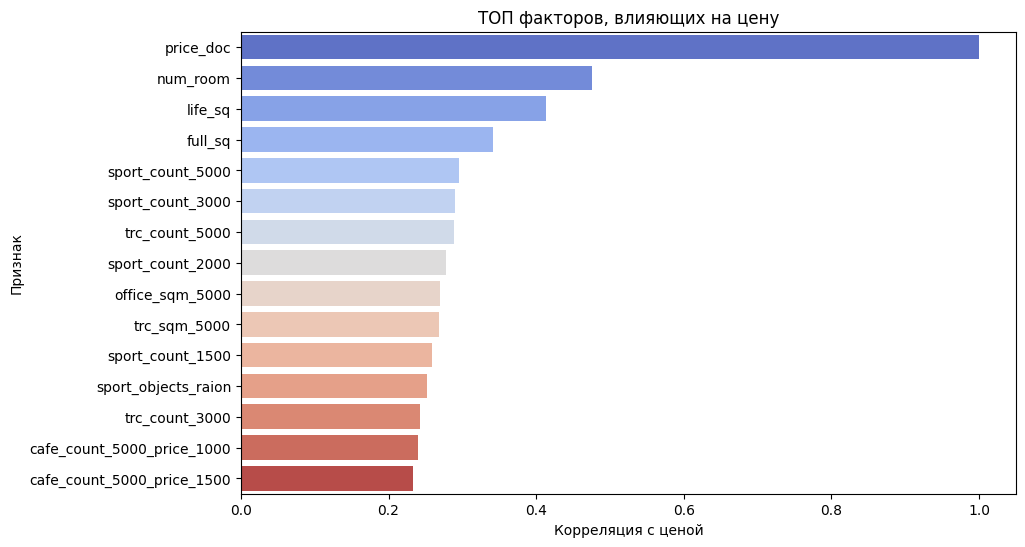

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)['price_doc'].sort_values(ascending=False).head(15)
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("ТОП факторов, влияющих на цену")
plt.xlabel("Корреляция с ценой")
plt.ylabel("Признак")
plt.savefig("results/plots/06_top_correlations_with_price.png", dpi=300, bbox_inches="tight")

plt.show()


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Убираем целевую переменную, чтобы не сравнивать price_doc с price_doc
corr = (
    df.drop(columns=['price_doc'])
      .corr(numeric_only=True)['price_doc']
      .abs()
      .sort_values(ascending=False)
      .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("ТОП факторов, влияющих на цену (без учёта price_doc)")
plt.xlabel("Корреляция с ценой")
plt.ylabel("Признак")
plt.show()


KeyError: 'price_doc'

C:\Users\shari\AppData\Local\Temp\ipykernel_1480\2066002035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


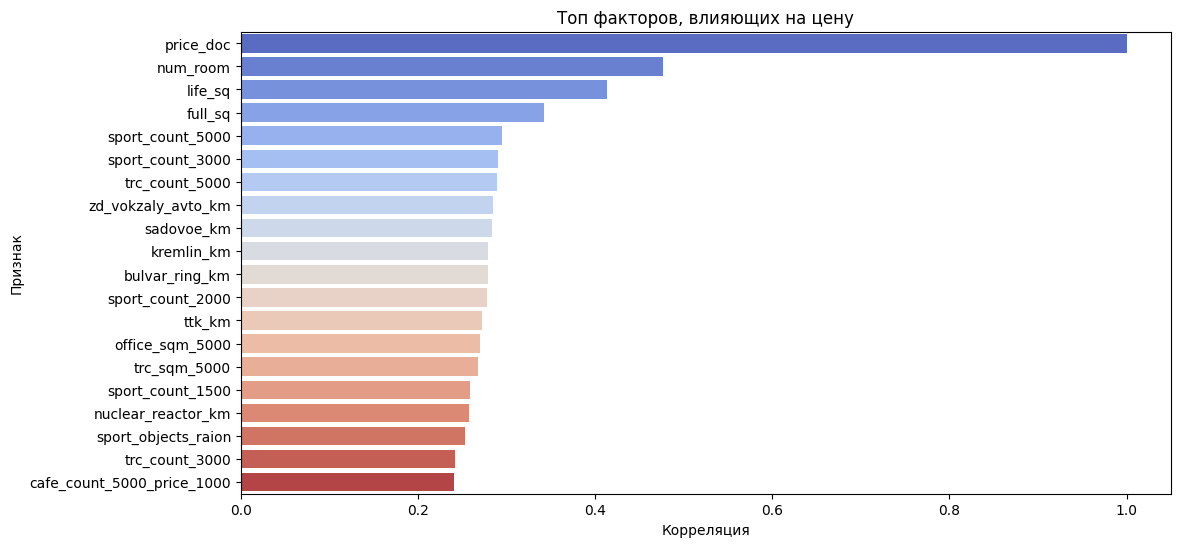

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = (
    df.corr(numeric_only=True)['price_doc']
      .abs()
      .sort_values(ascending=False)
      .head(20)
)

plt.figure(figsize=(12,6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title("Топ факторов, влияющих на цену")
plt.xlabel("Корреляция")
plt.ylabel("Признак")
plt.show()


In [25]:
import numpy as np
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/cleaned_data.csv")   # если так называется файл


In [26]:
df["log_price"] = np.log1p(df["price_doc"])
df["price_per_m2"] = df["price_doc"] / df["full_sq"]


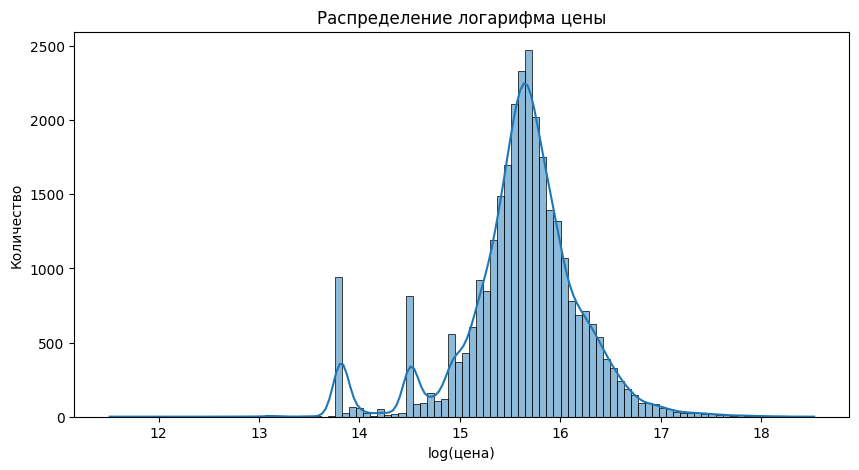

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df["log_price"], bins=100, kde=True)
plt.title("Распределение логарифма цены")
plt.xlabel("log(цена)")
plt.ylabel("Количество")
plt.savefig("results/plots/09_log_price_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


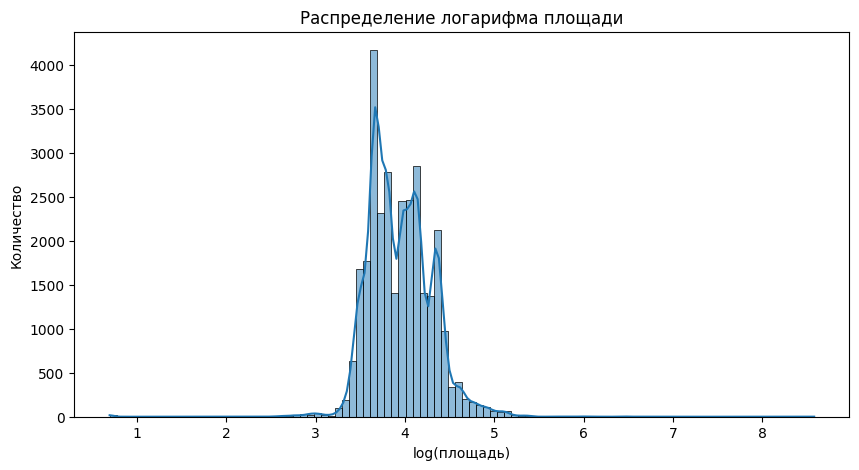

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(numpy.log1p(df["full_sq"]), bins=100, kde=True)
plt.title("Распределение логарифма площади")
plt.xlabel("log(площадь)")
plt.ylabel("Количество")
plt.savefig("results/plots/10_log_area_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


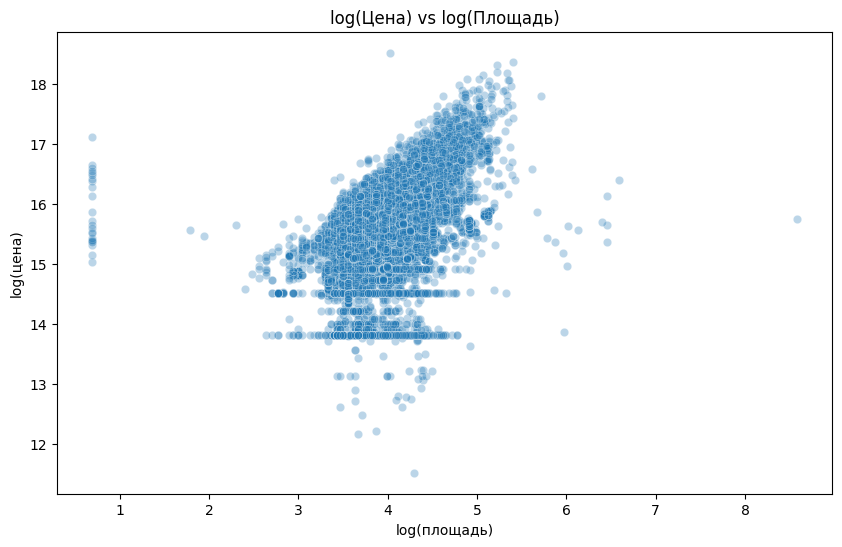

In [29]:
log_area = numpy.log1p(df["full_sq"])
log_price = df["log_price"]

plt.figure(figsize=(10,6))
sns.scatterplot(x=log_area, y=log_price, alpha=0.3)
plt.title("log(Цена) vs log(Площадь)")
plt.xlabel("log(площадь)")
plt.ylabel("log(цена)")
plt.savefig("results/plots/11_log_price_vs_log_area.png", dpi=300, bbox_inches="tight")
plt.show()
